### Analyzing the biggest errors 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle('error_analysis.pkl')

In [39]:
NON_CAT_FEATURES = ['quantity',
                    'days_to_maturity',
                    'days_to_call',
                    'coupon',
                    'issue_amount',
                    'last_seconds_ago',
                    'last_yield_spread',
                     'days_to_settle',
                     'days_to_par',
                     'maturity_amount',
                     'issue_price',
                     'orig_principal_amount',
                     'max_amount_outstanding',
                     'accrued_days',
                     'days_in_interest_payment',
                     'A/E',
                     'ficc_treasury_spread',
                     'max_ys_ys',
                     'max_ys_ago',
                     'max_ys_qdiff',
                     'min_ys_ys',
                     'min_ys_ago',
                     'min_ys_qdiff',
                     'max_qty_ys',
                     'max_qty_ago',
                     'max_qty_qdiff',
                     'min_ago_ys',
                     'min_ago_ago',
                     'min_ago_qdiff',
                     'D_min_ago_ys',
                     'D_min_ago_ago',
                     'D_min_ago_qdiff',
                     'P_min_ago_ys',
                     'P_min_ago_ago',
                     'P_min_ago_qdiff',
                     'S_min_ago_ys',
                     'S_min_ago_ago',
                     'S_min_ago_qdiff',
                     'dv01',
                     'approx_dpd',
                     'overage',
                     'de_minimis_gap']

In [40]:
BINARY = ['callable',
         'sinking',
         'zerocoupon',
         'is_non_transaction_based_compensation',
         'is_general_obligation',
         'callable_at_cav',
         'extraordinary_make_whole_call',
         'make_whole_call',
         'has_unexpired_lines_of_credit',
         'escrow_exists']

In [41]:
CATEGORICAL_FEATURES = ['rating',
                         'incorporated_state_code',
                         'trade_type',
                         'purpose_class',
                         'max_ys_ttypes',
                         'min_ys_ttypes',
                         'max_qty_ttypes',
                         'min_ago_ttypes',
                         'D_min_ago_ttypes',
                         'P_min_ago_ttypes',
                         'S_min_ago_ttypes']

In [65]:
large_errors = df[df.absolute_delta > 50]#[['cusip','trade_date','yield','predicted_ytw','absolute_delta']].sort_values('absolute_delta',ascending=False)

In [66]:
small_errors = df[df.absolute_delta < 3]

In [67]:
large_errors.shape

(13167, 88)

In [68]:
small_errors.shape

(247041, 88)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


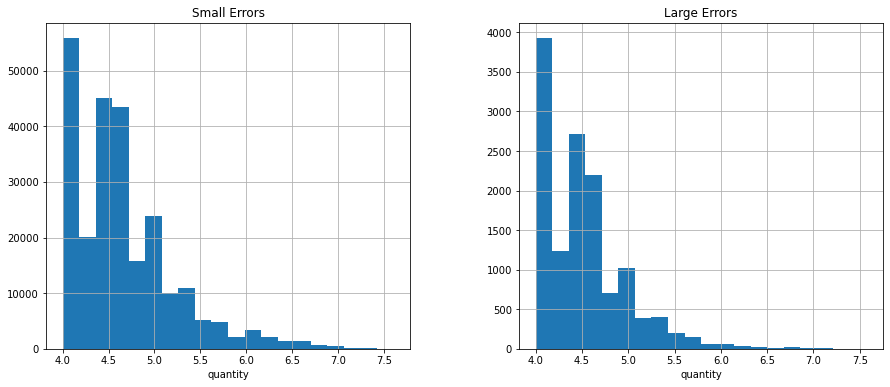

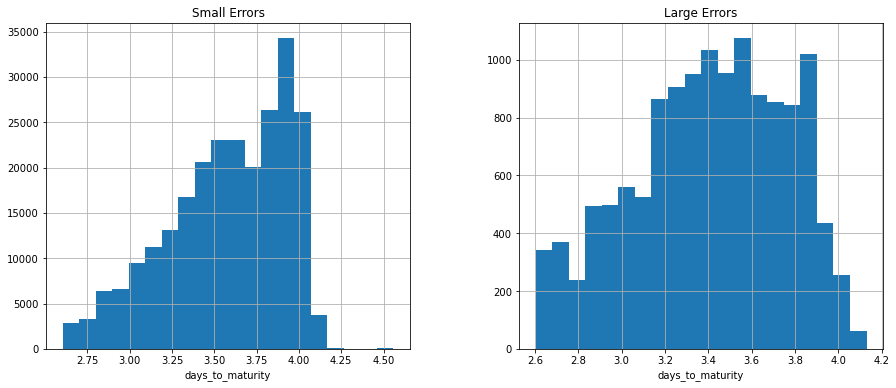

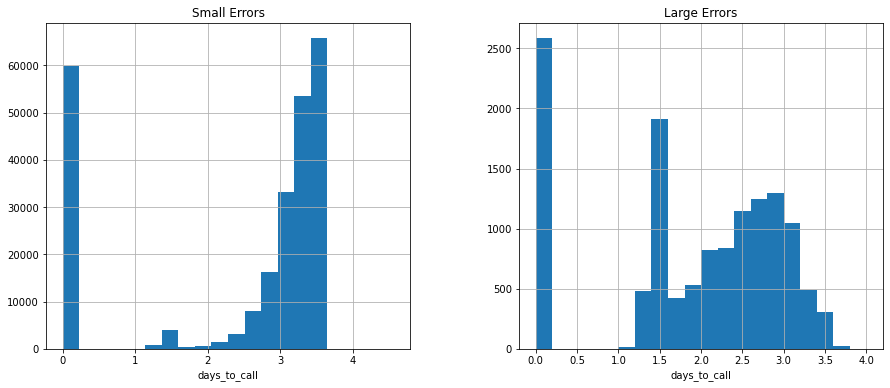

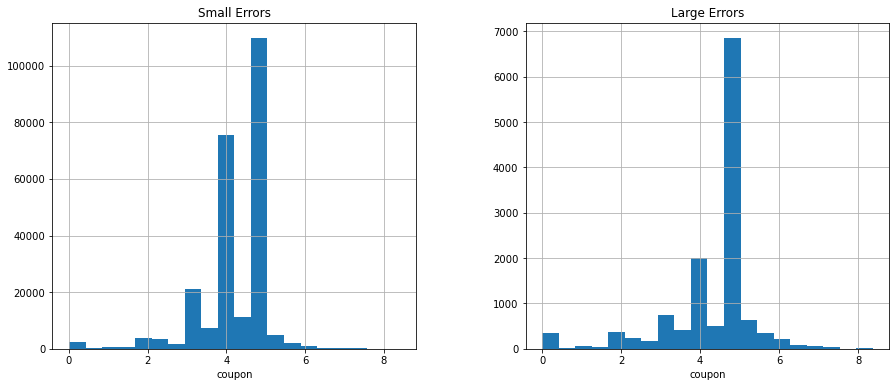

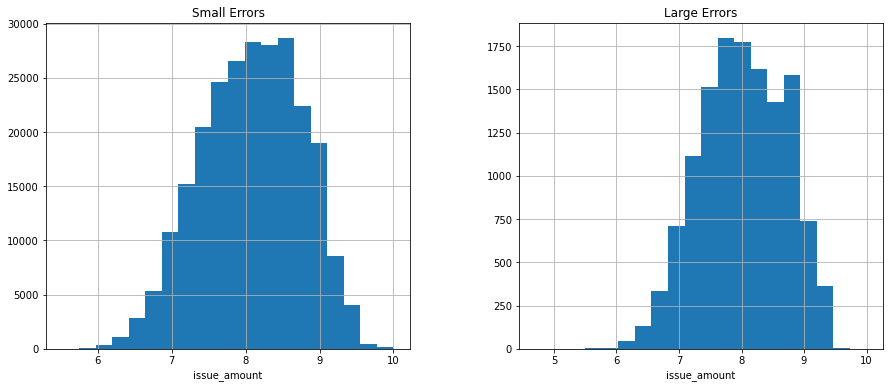

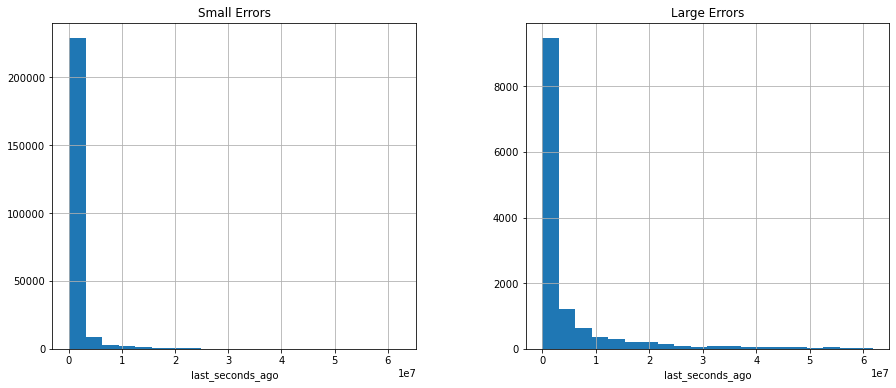

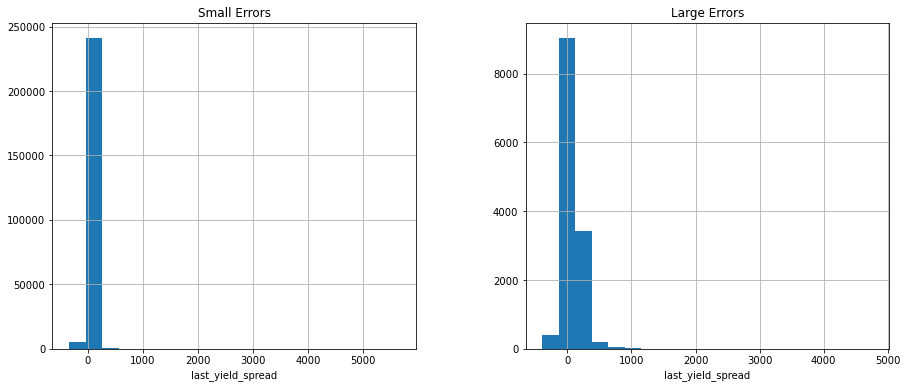

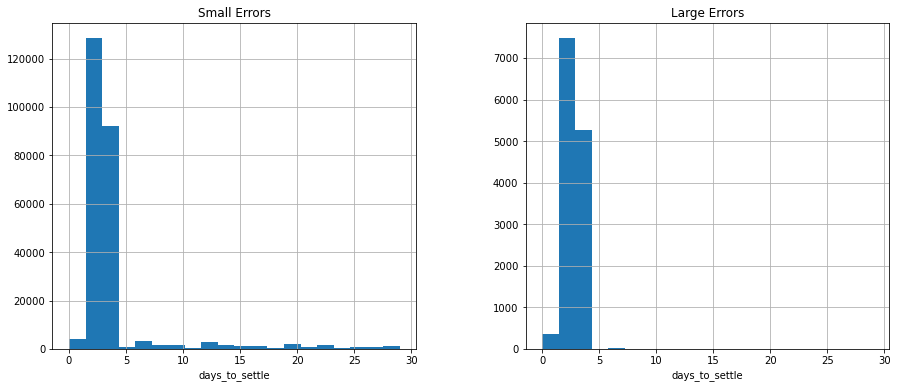

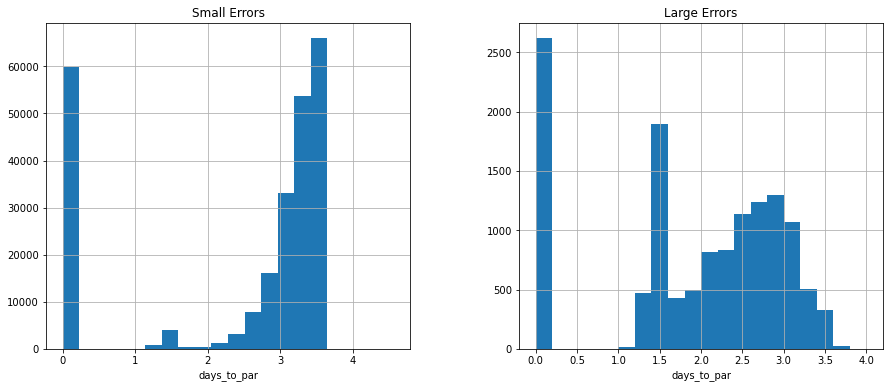

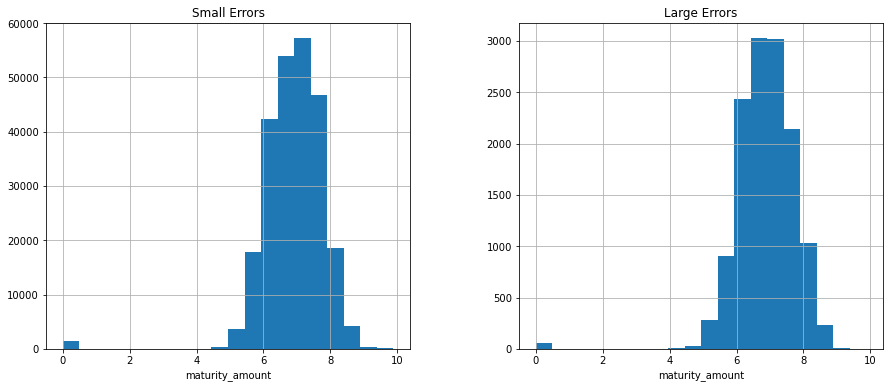

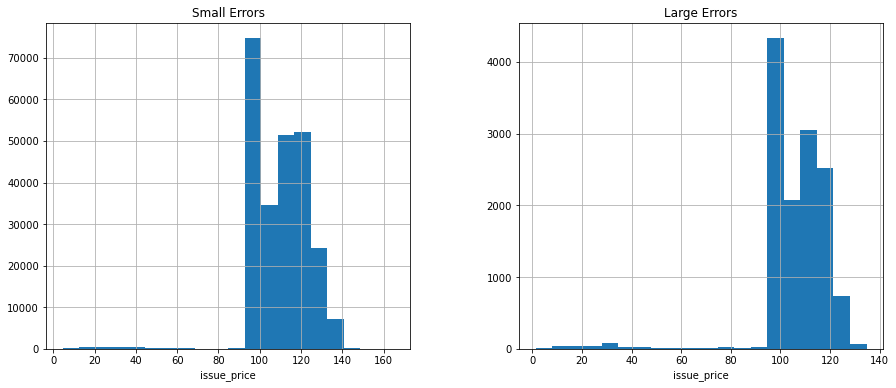

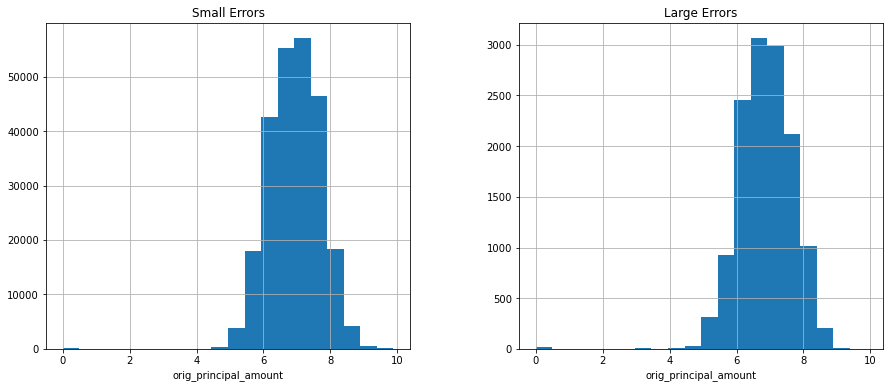

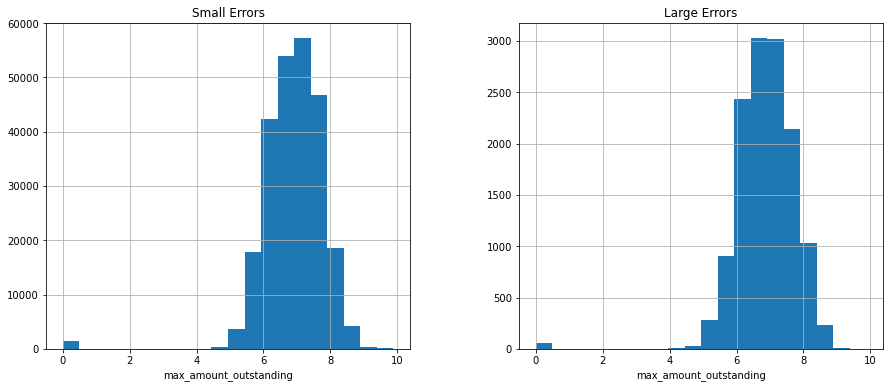

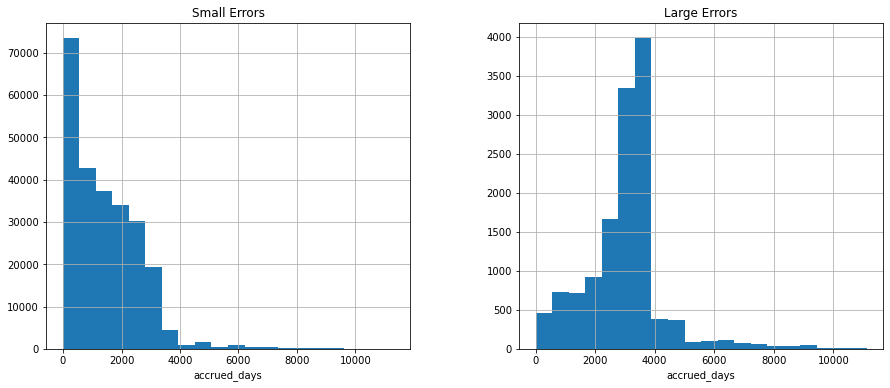

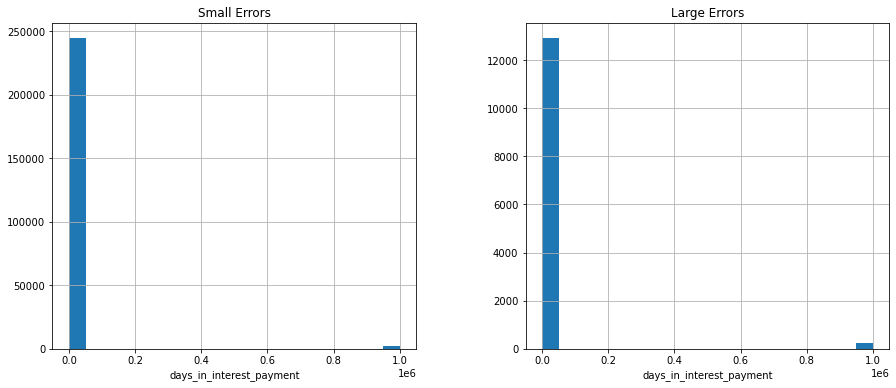

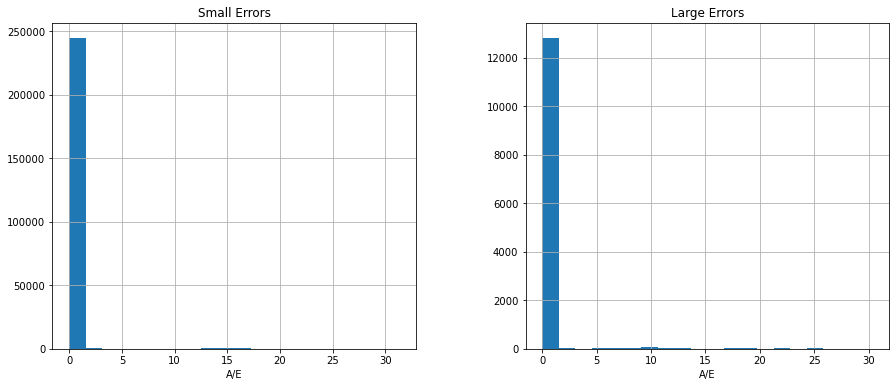

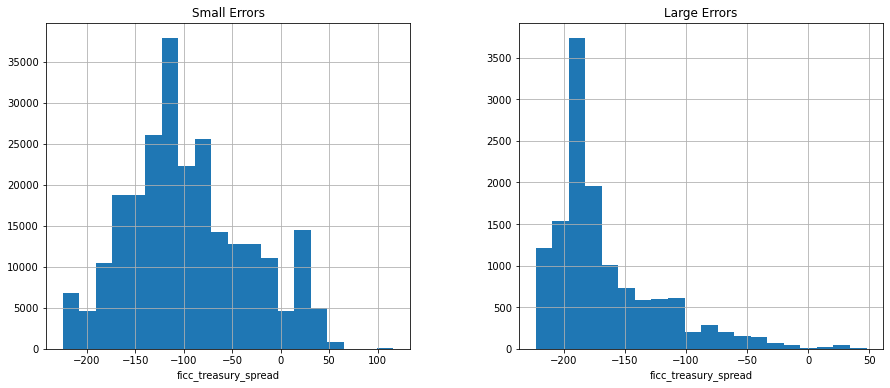

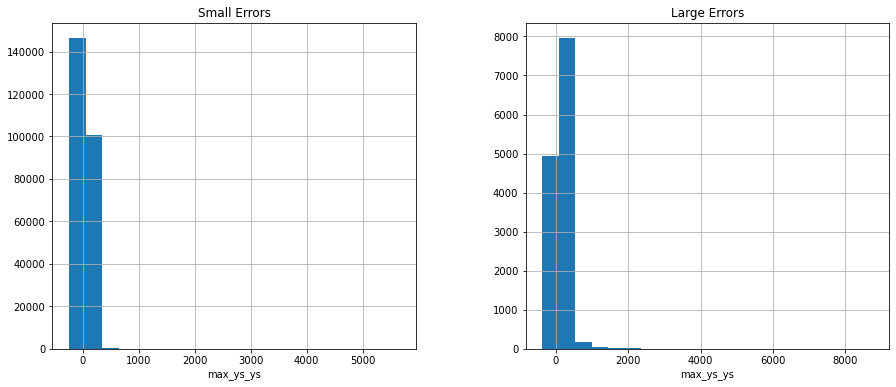

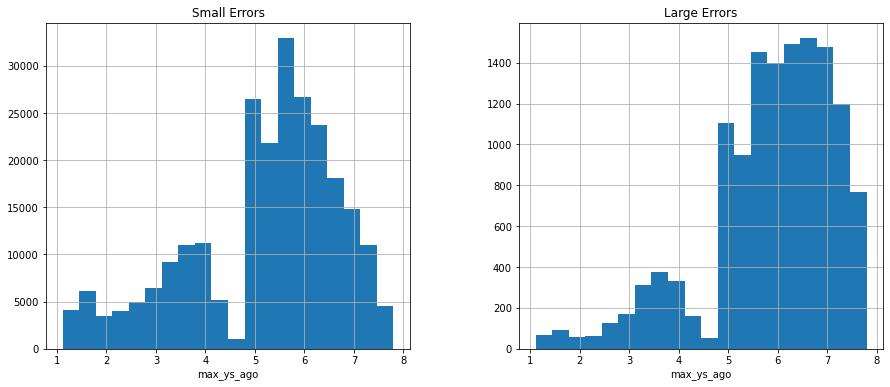

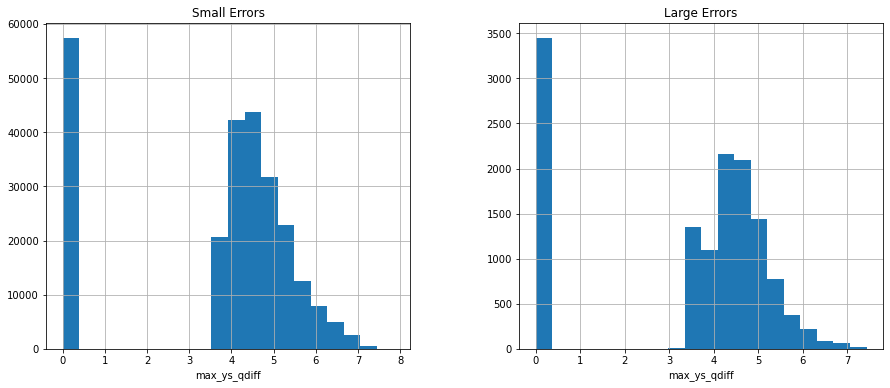

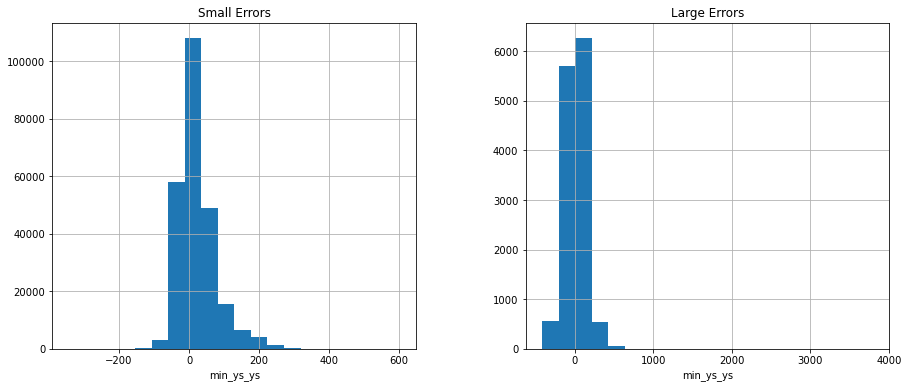

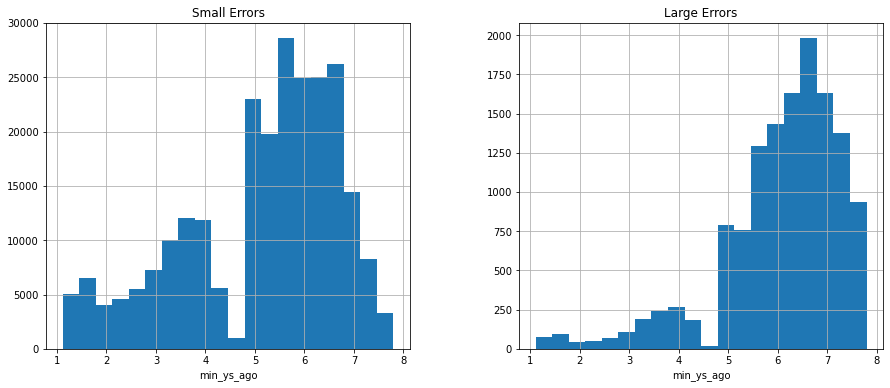

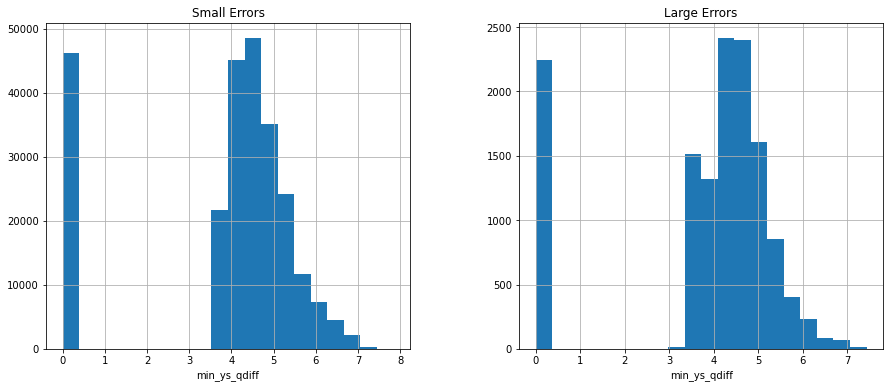

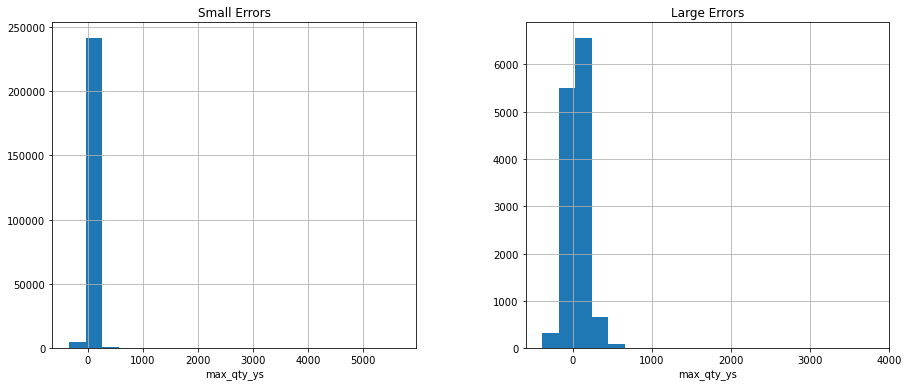

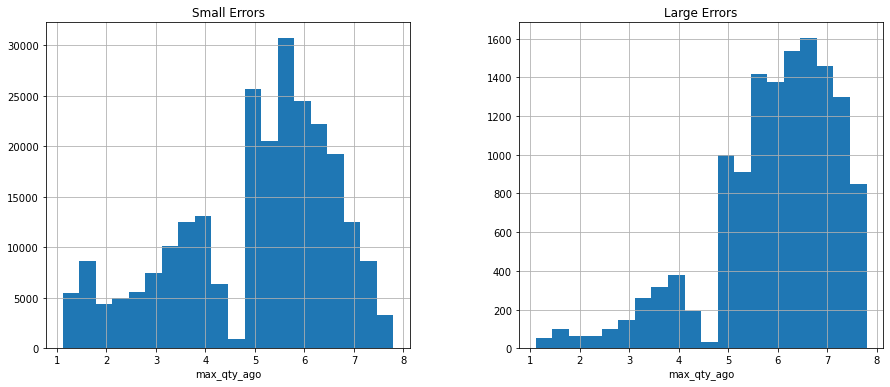

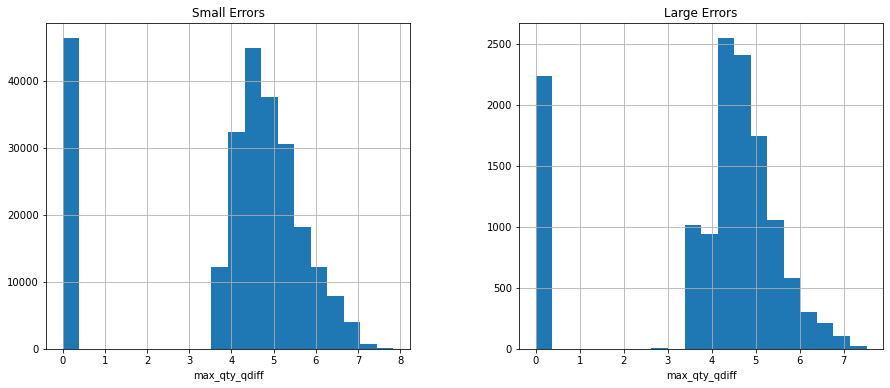

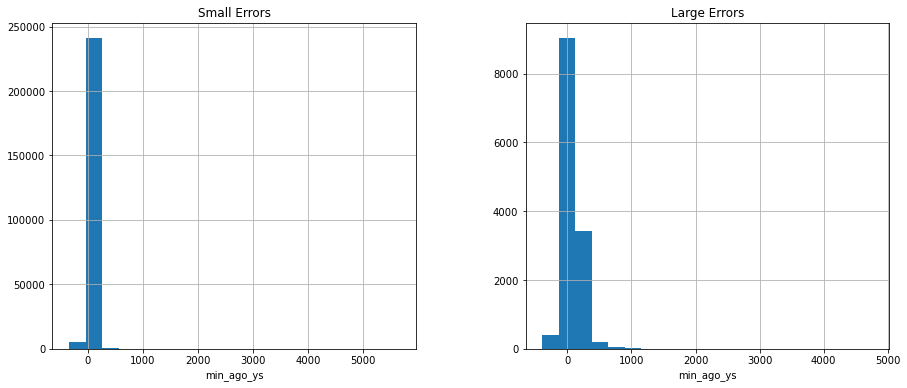

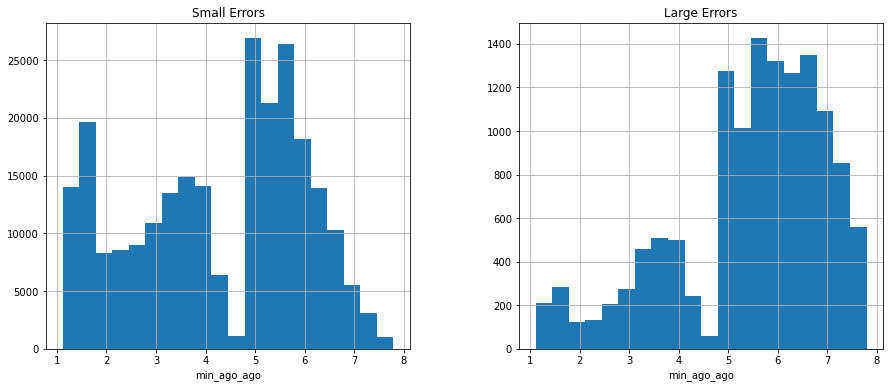

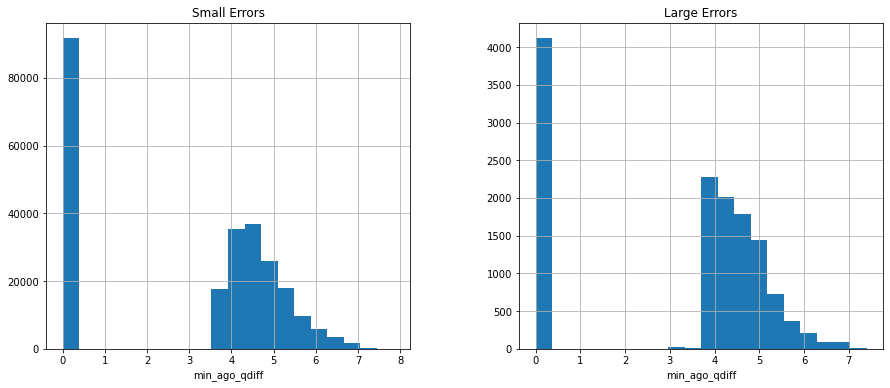

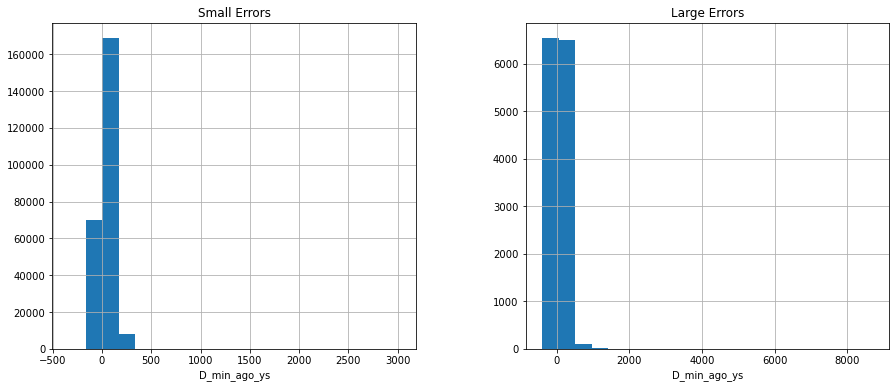

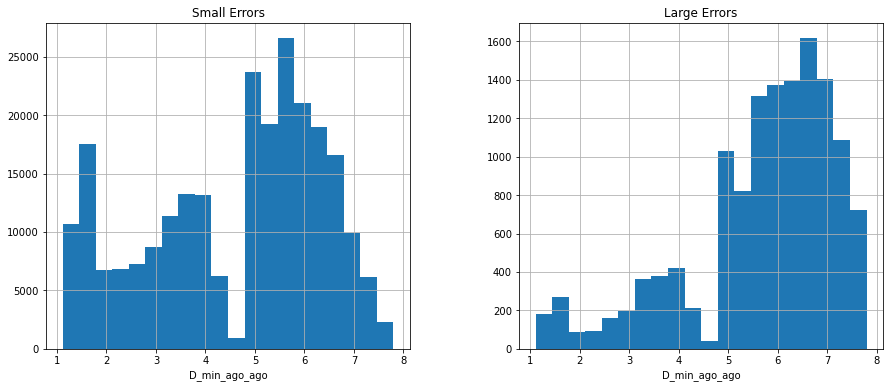

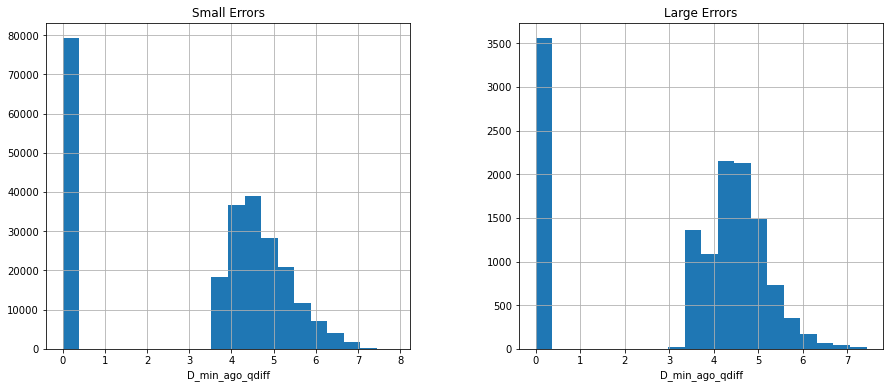

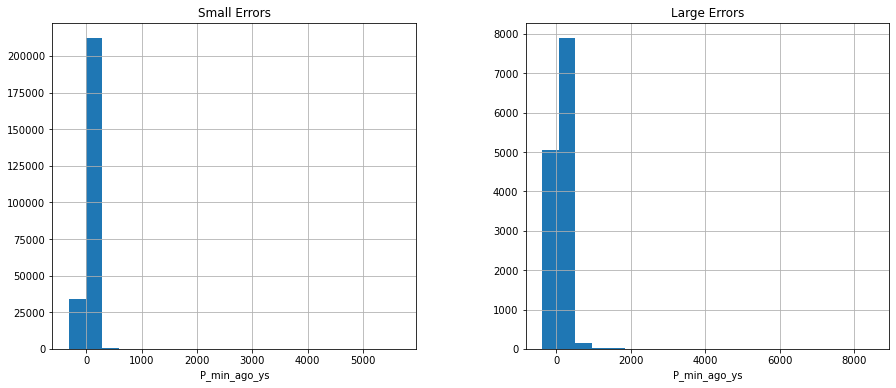

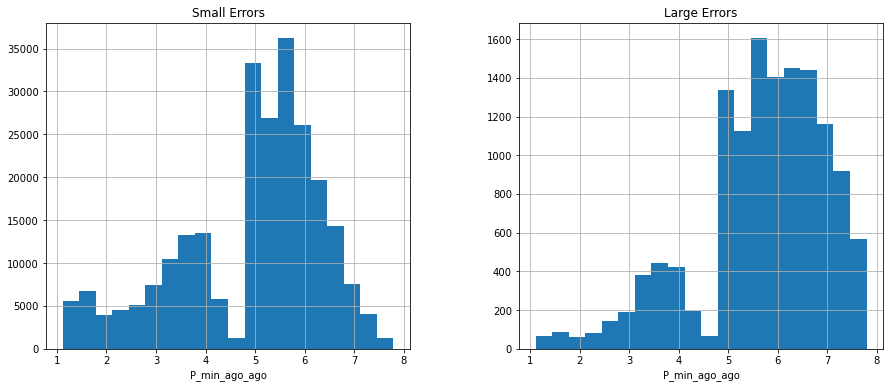

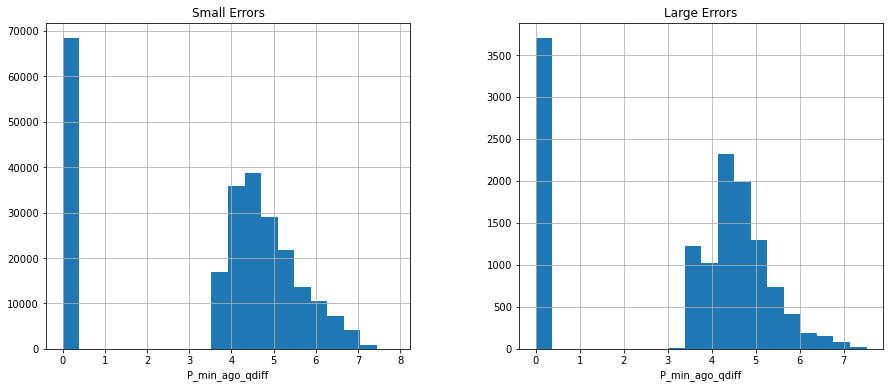

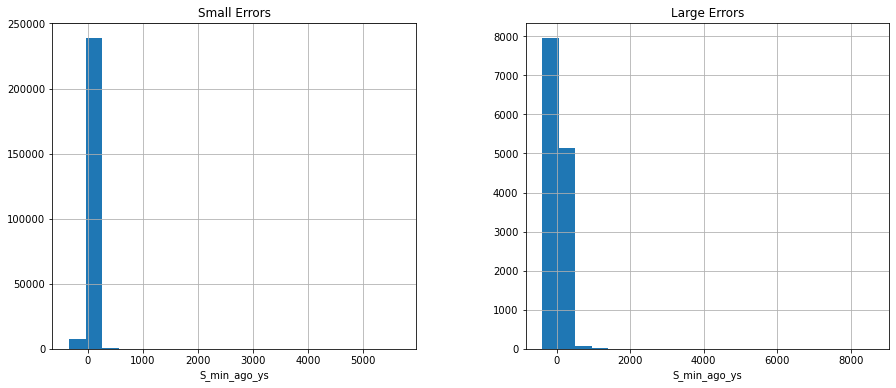

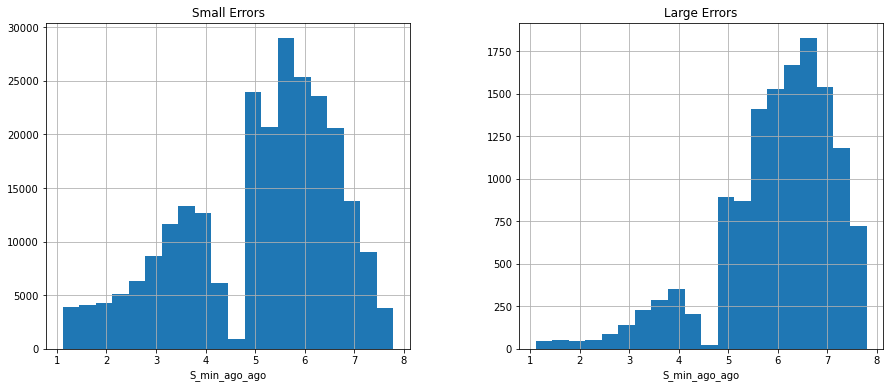

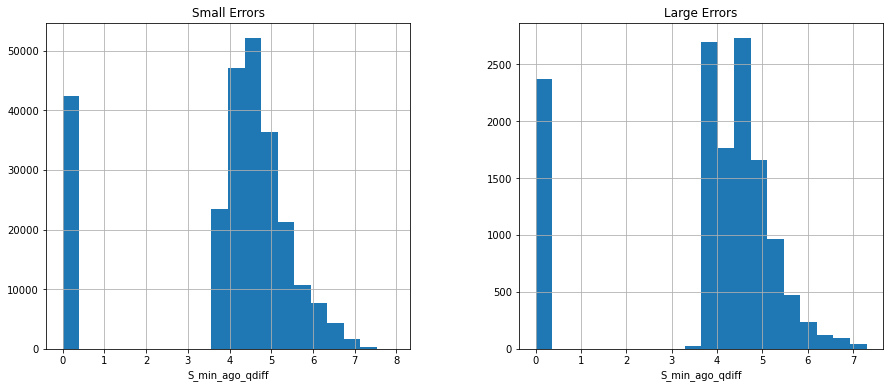

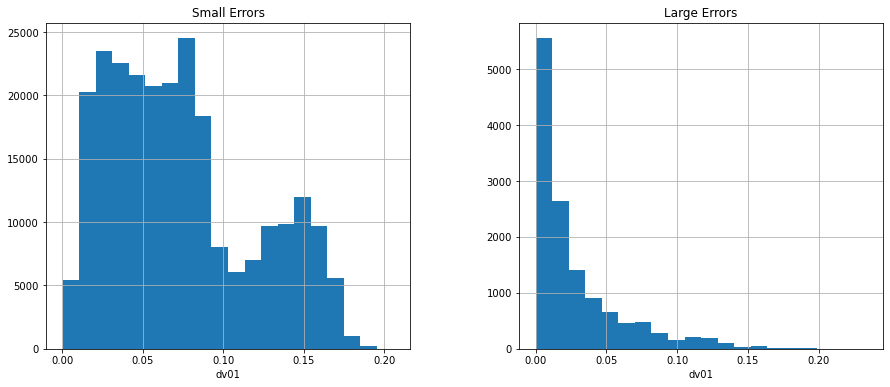

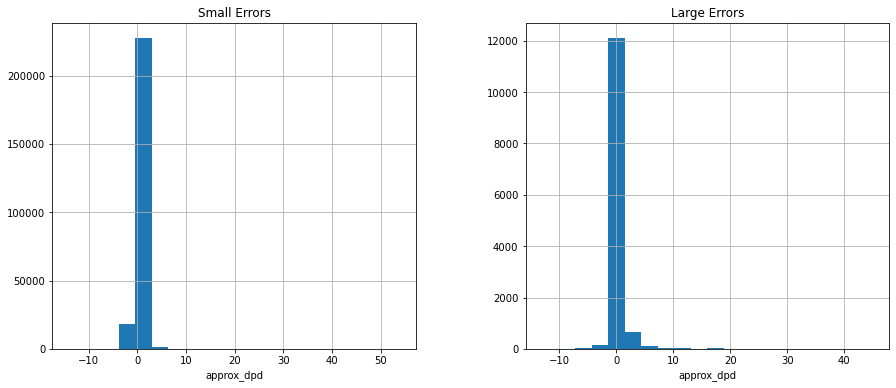

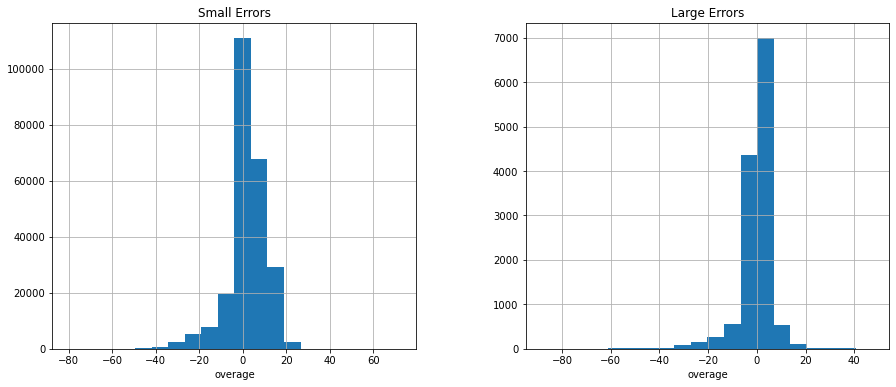

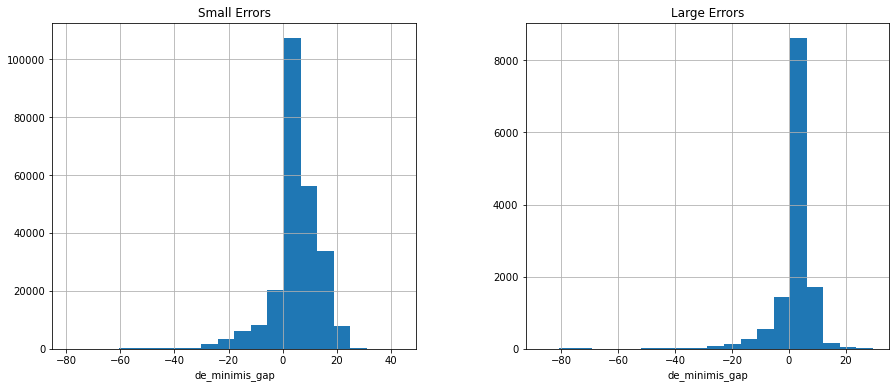

In [69]:
for col in NON_CAT_FEATURES:
    fig, axes = plt.subplots(1, 2, figsize=(15,6))
    small_errors.hist(col, bins=20, ax=axes[0])
    large_errors.hist(col, bins=20, ax=axes[1])
    axes[0].set_title('Small Errors')
    axes[1].set_title('Large Errors')
    axes[0].set_xlabel(col)
    axes[1].set_xlabel(col)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


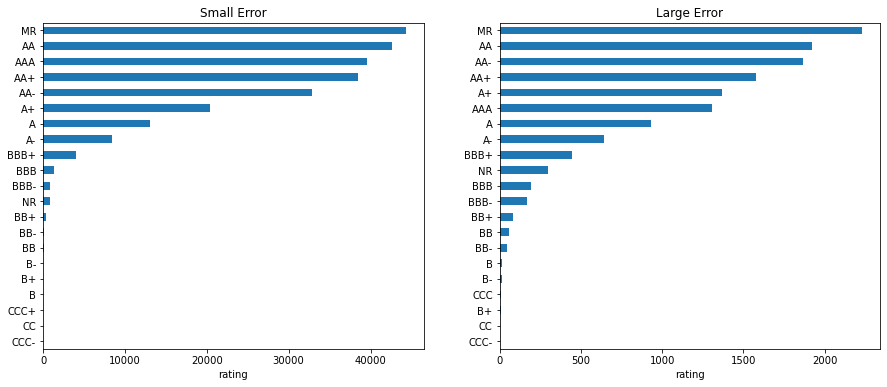

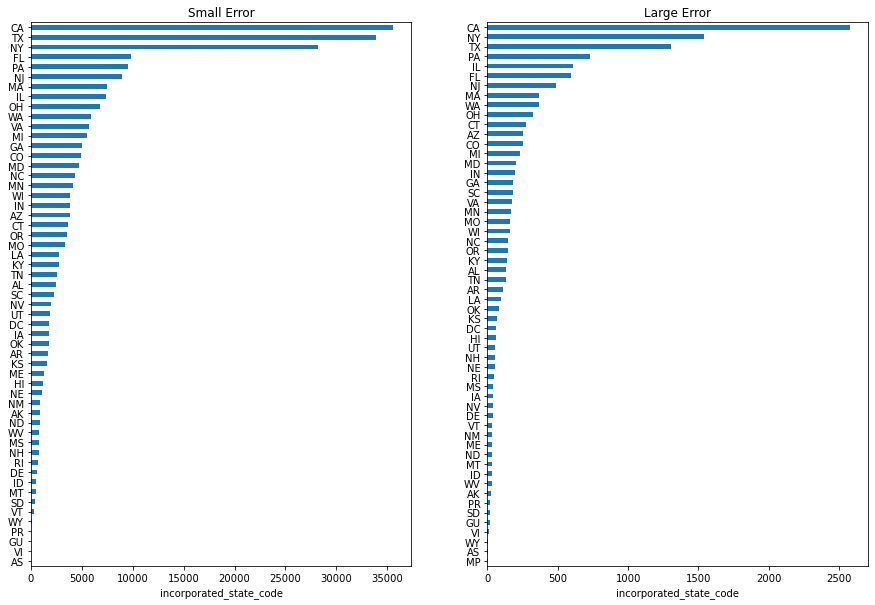

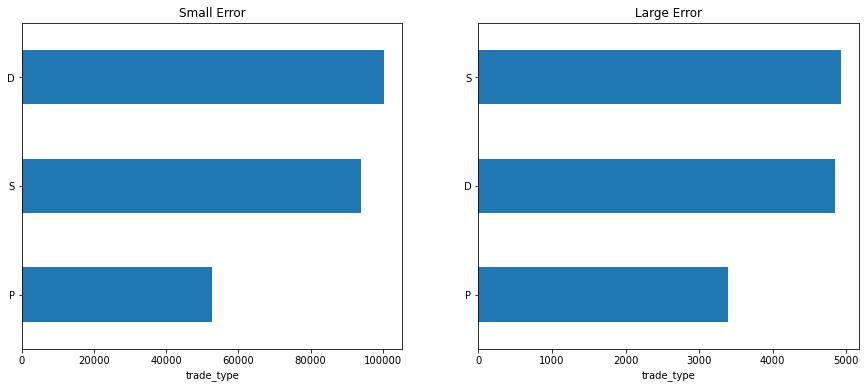

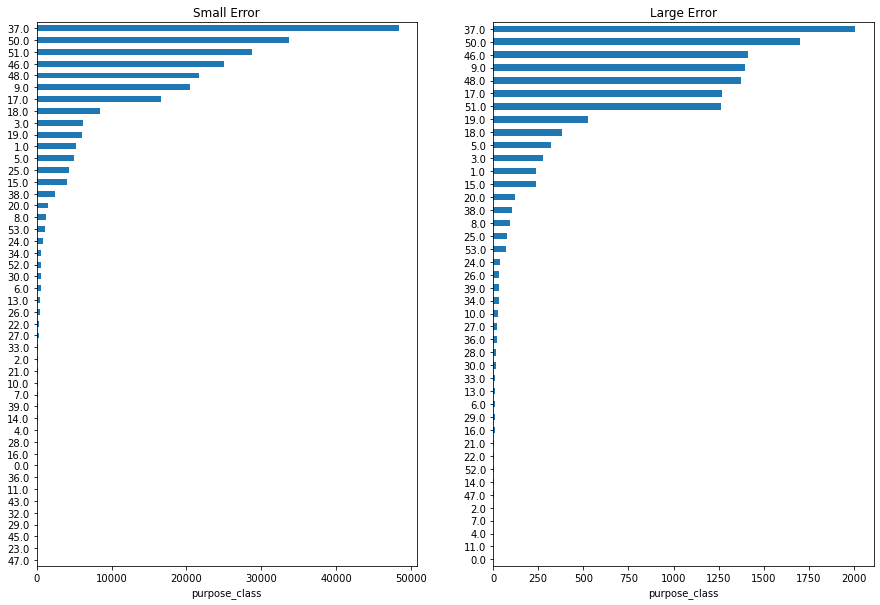

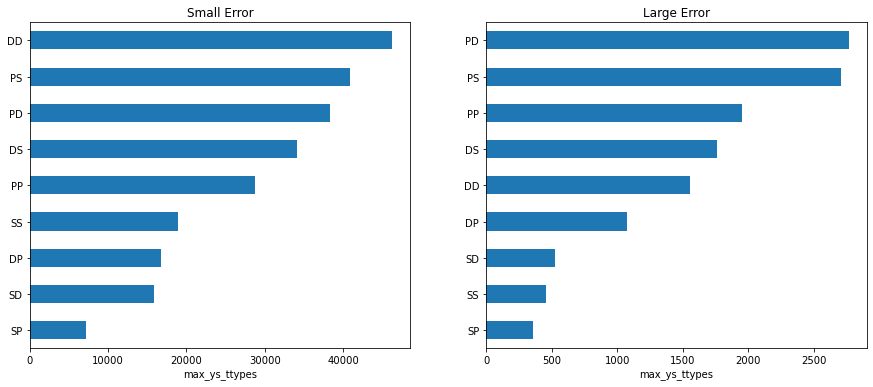

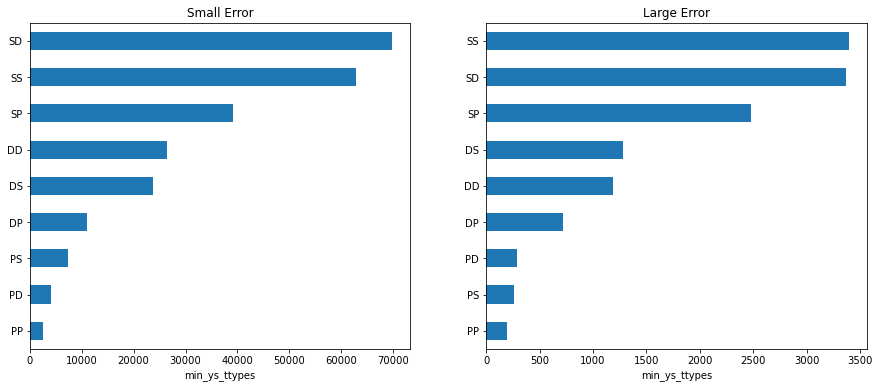

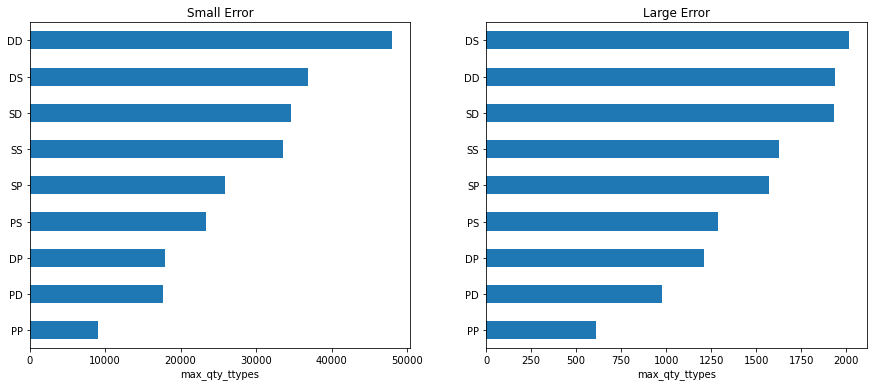

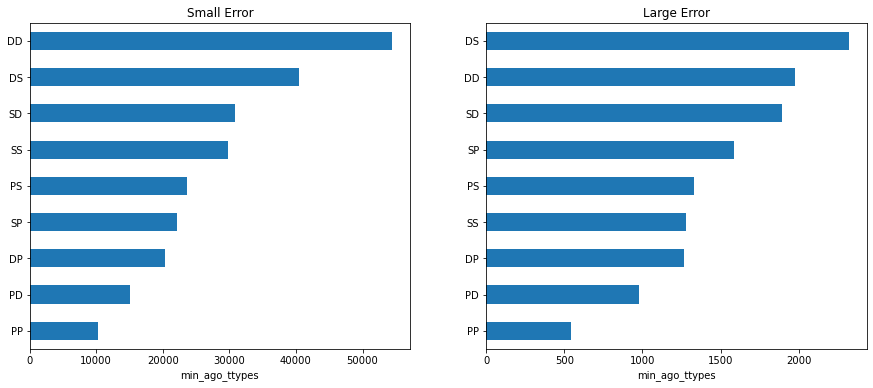

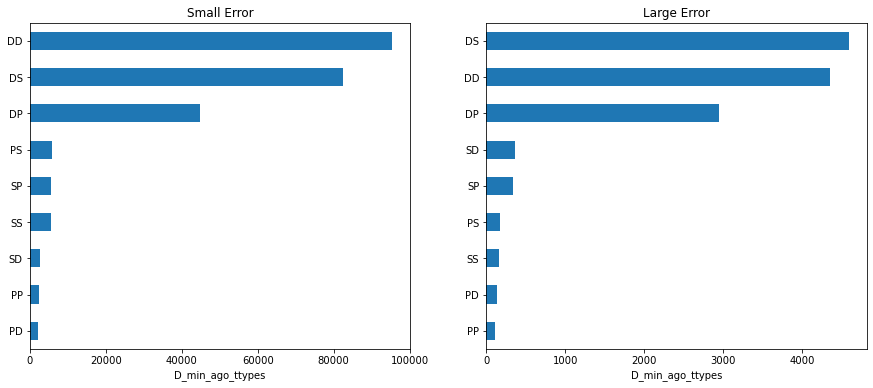

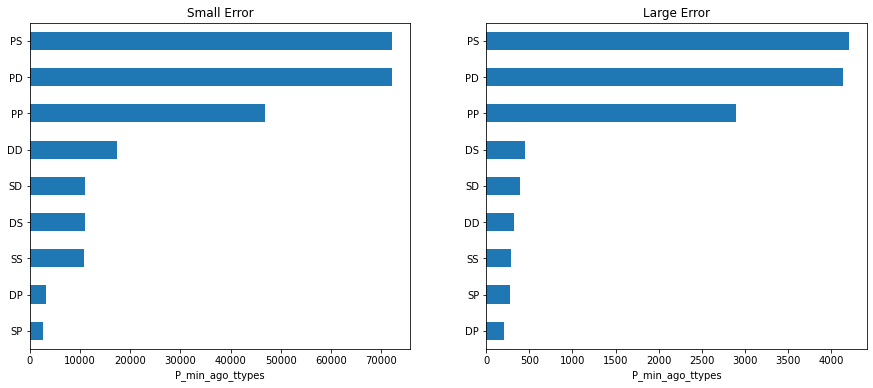

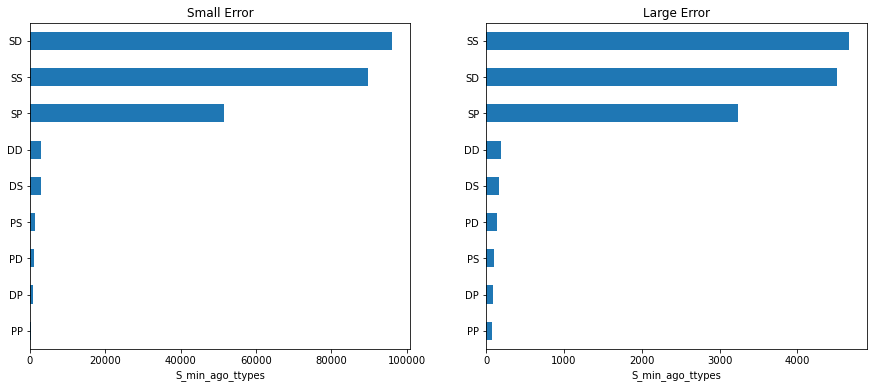

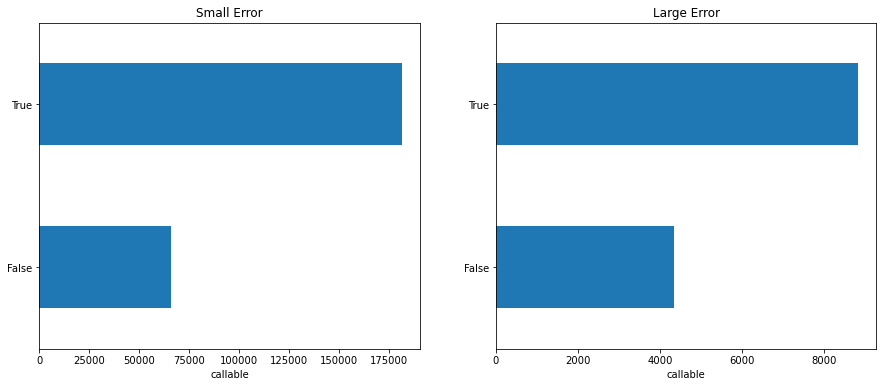

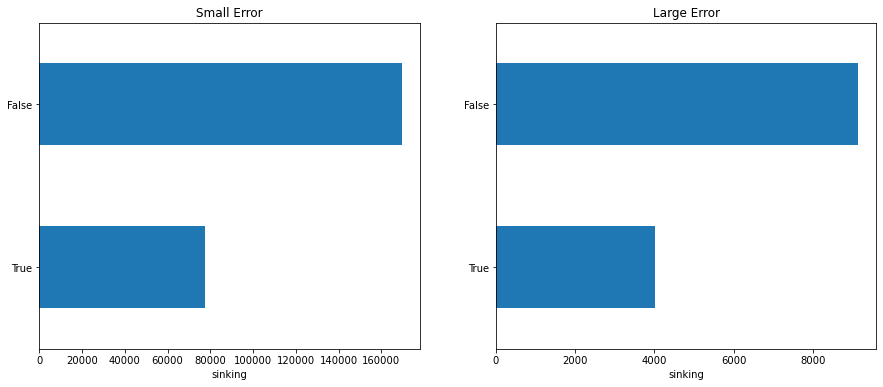

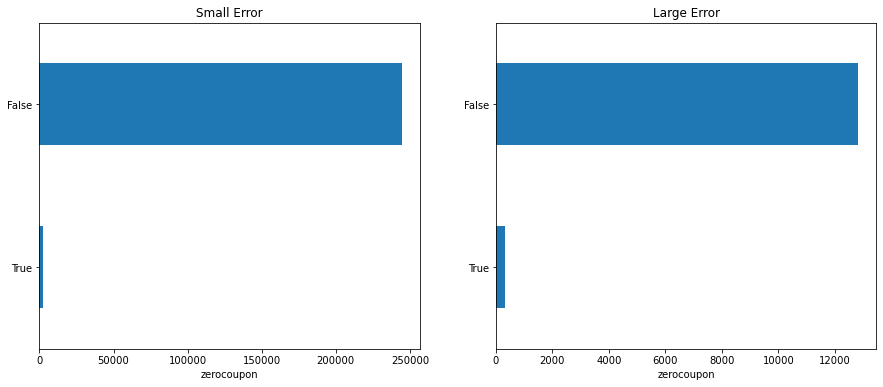

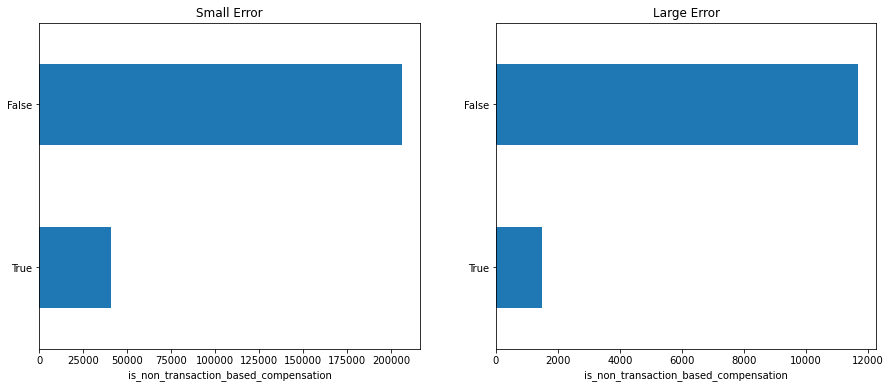

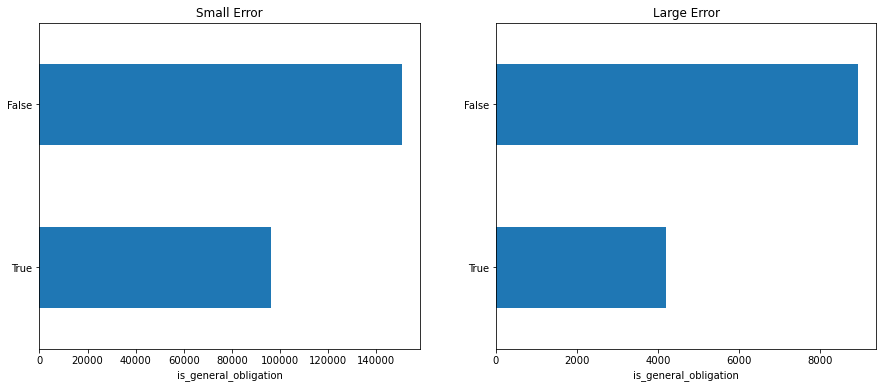

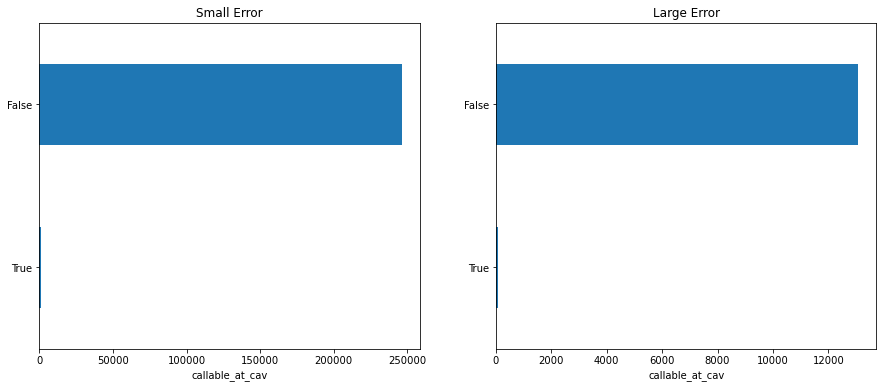

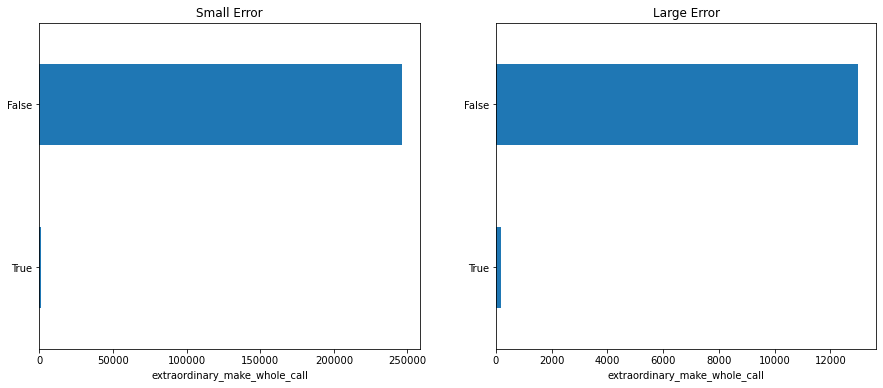

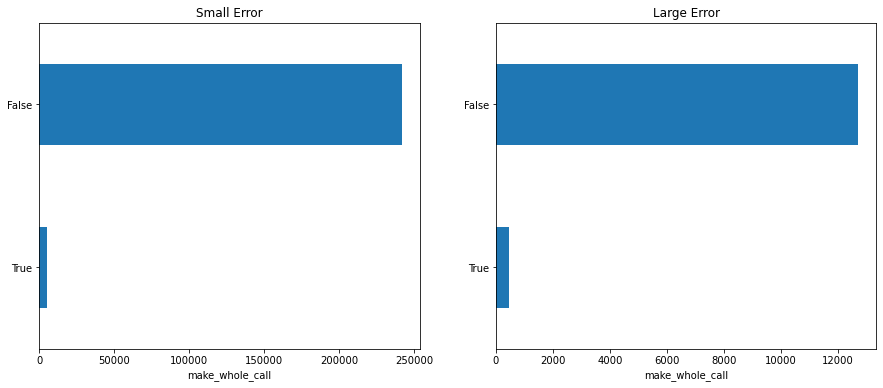

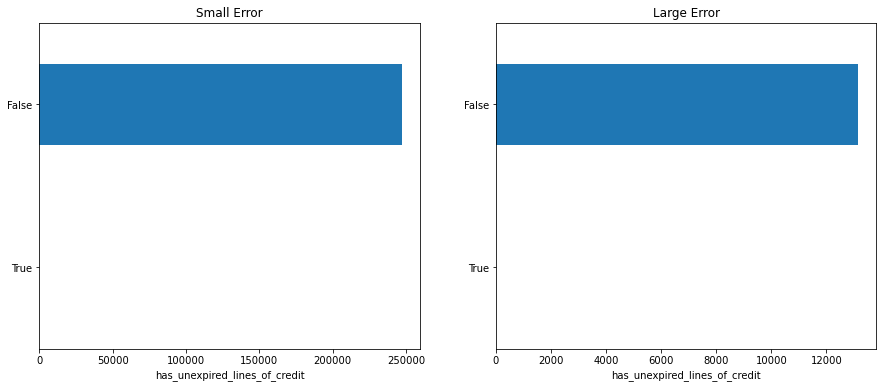

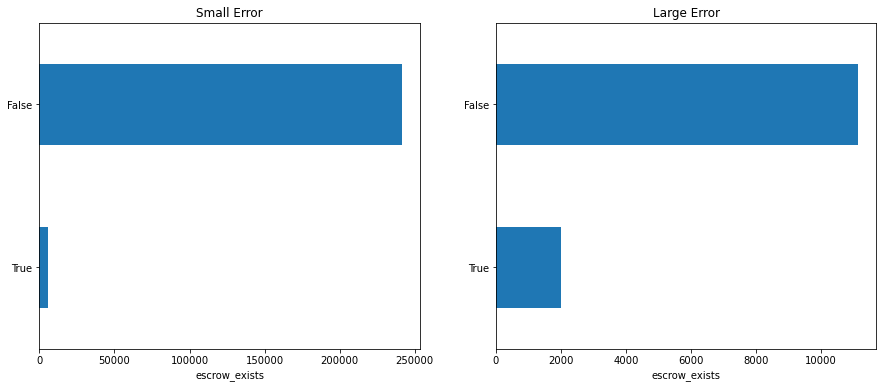

In [71]:
for col in CATEGORICAL_FEATURES + BINARY:
    if col in ['incorporated_state_code', 'purpose_class']:
        fig, axes = plt.subplots(1, 2, figsize=(15,10))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15,6))
    small_errors[col].value_counts().sort_values().plot(kind = 'barh', ax=axes[0])
    large_errors[col].value_counts().sort_values().plot(kind = 'barh', ax=axes[1])
    axes[0].set_title('Small Error')
    axes[1].set_title('Large Error')
    axes[0].set_xlabel(col)
    axes[1].set_xlabel(col)

In [72]:
df.shape

(706734, 88)